In [1]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "0"

import numpy as np
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
# jax.config.update("jax_platforms", 'cpu')

from ImageD11.unitcell import unitcell
from ImageD11.parameters import AnalysisSchema
from ImageD11.columnfile import columnfile

In [2]:
import ImageD11
asc = ImageD11.unitcell.Phases.from_json('pars.json')
ucell = asc.unitcells['Cu']
ucell

Cu | [ 3.615  3.615  3.615 90.    90.    90.   ] | 225

In [3]:
pars = asc.geometry_pars_obj

In [4]:
npx = 2_048

In [5]:
pars.set('distance', 130e3)  # 130 mm
pars.set('wavelength', 0.1771)
pars.set('y_center', npx//2)
pars.set('z_center', npx//2)
pars.set('chi', 0.0)
pars.set('wedge', 0.0)
pars.set('y_size', 75.0)
pars.set('z_size', 75.0)
pars.set('tilt_x', 0.0)
pars.set('tilt_y', 0.0)
pars.set('tilt_z', 0.0)

In [6]:
pars.get_parameters()

{'chi': 0.0,
 'distance': 130000.0,
 'fit_tolerance': 0.05,
 'min_bin_prob': 1e-05,
 'no_bins': 10000,
 'o11': -1,
 'o12': 0,
 'o21': 0,
 'o22': -1,
 'omegasign': 1.0,
 't_x': 0.0,
 't_y': 0.0,
 't_z': 0.0,
 'tilt_x': 0.0,
 'tilt_y': 0.0,
 'tilt_z': 0.0,
 'wavelength': 0.1771,
 'wedge': 0.0,
 'weight_hist_intensities': 'False',
 'y_center': 1024,
 'y_size': 75.0,
 'z_center': 1024,
 'z_size': 75.0}

In [7]:
import Dans_Diffraction as dif

crystal = dif.Crystal('EntryWithCollCode7954_scaled.cif')
crystal.Scatter.setup_scatter(scattering_type='xray',
                              wavelength_a=asc.geometry_pars_obj.get('wavelength'), 
                              powder_units='twotheta',
                              min_twotheta=0.1,
                              max_twotheta=30,
                              min_theta=-np.inf,
                              max_theta=np.inf
                             )

Scatter(EntryWithCollCode7954_scaled with 1 atomic positions, 192 symmetries)
       Type: xray
     Energy: 70.00814733413704 keV
 Wavelength: 0.17709999999999998 A
 ---Settings---
      Powder units: twotheta
    Isotropic ADPs: True
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
      theta offset: 0.0
         min theta: -inf
         max theta: inf
      min twotheta: 0.1
      max twotheta: 30
 ---X-Ray Settings---
 Waasmaier scattering factor: False
 ---Neutron Settings---
 Sears (ITC) scattering lengths: False
 ---Magnetic Settings---
   Mag. scattering: True
  Mag. form factor: True
         Polarised: False
      Polarisation: sp
       Pol. vector: (0,1,0)
 ---Resonant Settings---
   Azimuthal angle: 0
    Azimuthal ref.: (1,0,0)
               flm: (0,1,0)
  use e1e1 approx.: True



In [8]:
ref_ucell = ucell

In [9]:
# ref_ucell = unitcell([2.8, 2.8, 2.8, 90, 90, 90], 229)  # BCC Fe

In [10]:
ref_ucell.makerings(3.5)
hkls = []
mults = []
for i, d in enumerate(ref_ucell.ringds):
    hklring = ref_ucell.ringhkls[d]
    mults.append( len(hklring) )
    print(i, len(hklring),hklring[0],d)
    hkls += list(hklring)

hkls = np.array(hkls)

0 8 (-1, -1, -1) 0.47912885409927447
1 6 (0, -2, 0) 0.5532503457814661
2 12 (-2, -2, 0) 0.7824141423917538
3 24 (-1, -3, -1) 0.9174619060457537
4 8 (-2, -2, -2) 0.9582577081985489
5 6 (0, -4, 0) 1.1065006915629323
6 24 (-3, -1, -3) 1.2057811738701725
7 24 (-2, 0, -4) 1.2371053817426223
8 24 (-2, -2, -4) 1.3551810471829477
9 32 (-3, -3, -3) 1.4373865622978232
10 12 (-4, -4, 0) 1.5648282847835076
11 48 (-1, -3, -5) 1.6365365928353015
12 30 (0, -6, 0) 1.6597510373443982
13 24 (-2, 0, -6) 1.7495312089451613
14 24 (-5, -3, -3) 1.8139525655053943
15 24 (-2, -6, -2) 1.8349238120915075
16 8 (-4, -4, -4) 1.9165154163970979
17 48 (-7, -1, -1) 1.9754988737324617
18 24 (-4, 0, -6) 1.994772489883258
19 48 (-4, -2, -6) 2.07007324302846
20 72 (-5, -5, -3) 2.1247982705030726
21 6 (-8, 0, 0) 2.2130013831258646
22 24 (-3, -7, -3) 2.2642746256908572
23 48 (-8, 0, -2) 2.2811096130664787
24 36 (0, -6, -6) 2.3472424271752614
25 56 (-1, -5, -7) 2.3956442704963723
26 24 (-6, -6, -2) 2.411562347740345
27 24 (-

In [11]:
hkls

array([[-1, -1, -1],
       [-1,  1, -1],
       [ 1, -1, -1],
       ...,
       [ 4, 12,  0],
       [ 0,  4, 12],
       [ 0, 12,  4]])

In [12]:
from scipy.spatial.transform import Rotation as R

ng = 1

U = R.random(ng).as_matrix()

U.shape

(1, 3, 3)

In [13]:
intensities = crystal.Scatter.intensity(hkls)

In [14]:
UB = U @ ref_ucell.B

In [15]:
inten_reshape = np.broadcast_to(intensities, (len(UB),len(hkls))).T
inten_reshape.shape

(2108, 1)

In [16]:
gves = (UB @ hkls.T).transpose(2, 0, 1)
gves.shape

(2108, 1, 3)

In [17]:
import transform_map_batch as mytrans

In [18]:
import importlib
importlib.reload(mytrans)

<module 'transform_map_batch' from '/home/esrf/james1997a/Code/Anri/anri/sandbox/transform_map_batch.py'>

In [19]:
# origin_sample: static, unevolving with rotation
# this needs to be broadcasted

In [20]:
# random positions
tx = np.random.random(ng) * 1000 - 500
ty = np.random.random(ng) * 1000 - 500
tz = np.random.random(ng) * 100 - 50
origin_sample = np.column_stack((tx, ty, tz))

In [21]:
# perfect positions
# origin_sample = np.zeros((ng,3))
# origin_sample.shape

In [22]:
origin_sample = np.broadcast_to(origin_sample, gves.shape)
origin_sample.shape

(2108, 1, 3)

In [23]:
gves = gves.reshape(-1, 3)
origin_sample = origin_sample.reshape(-1, 3)
inten_reshape = inten_reshape.reshape(-1)

In [24]:
k_in_wrong = jnp.array([1., 0., 0])

In [25]:
k_in_norm = mytrans._scale_norm_k(k_in_wrong, pars.get('wavelength'))

In [26]:
det_trans, beam_cen_shift, x_distance_shift = mytrans.detector_transforms(pars.get('y_center'), pars.get('y_size'), pars.get('tilt_y'),
                                                                          pars.get('z_center'), pars.get('z_size'), pars.get('tilt_z'),
                                                                          pars.get('tilt_x'),
                                                                          pars.get('distance'),
                                                                          pars.get('o11'), pars.get('o12'), pars.get('o21'),pars.get('o22'))

In [27]:
def total_fwd(gves, inten_reshape, origin_sample, k_in_wrong,
              wedge, chi, wavelength,
              det_trans, beam_cen_shift, x_distance_shift):
    k_in_norm = mytrans._scale_norm_k(k_in_wrong, wavelength)
    (sc1, sc2), (fc1, fc2), (omega1, omega2), valid = mytrans.q_and_origin_sample_to_det(gves, origin_sample, k_in_norm,
                                                                                         wedge, chi, wavelength,
                                                                                         det_trans, beam_cen_shift, x_distance_shift)

    sc = jnp.concatenate((sc1[valid], sc2[valid]))
    fc = jnp.concatenate((fc1[valid], fc2[valid]))
    omega = jnp.concatenate((omega1[valid], omega2[valid]))
    inten = jnp.concatenate((inten_reshape[valid], inten_reshape[valid]))
    m = (sc > 0) & (sc < npx) & (fc > 0) & (fc < npx)
    sc = sc[m]
    fc = fc[m]
    omega = omega[m]
    inten = inten[m]

    return sc, fc, omega, inten

In [28]:
sc, fc, omega, inten = total_fwd(gves, inten_reshape, origin_sample, k_in_wrong,
                                 pars.get('wedge'), pars.get('chi'), pars.get('wavelength'),
                                 det_trans, beam_cen_shift, x_distance_shift)

In [29]:
# now we have some perfect peaks that hit the detector

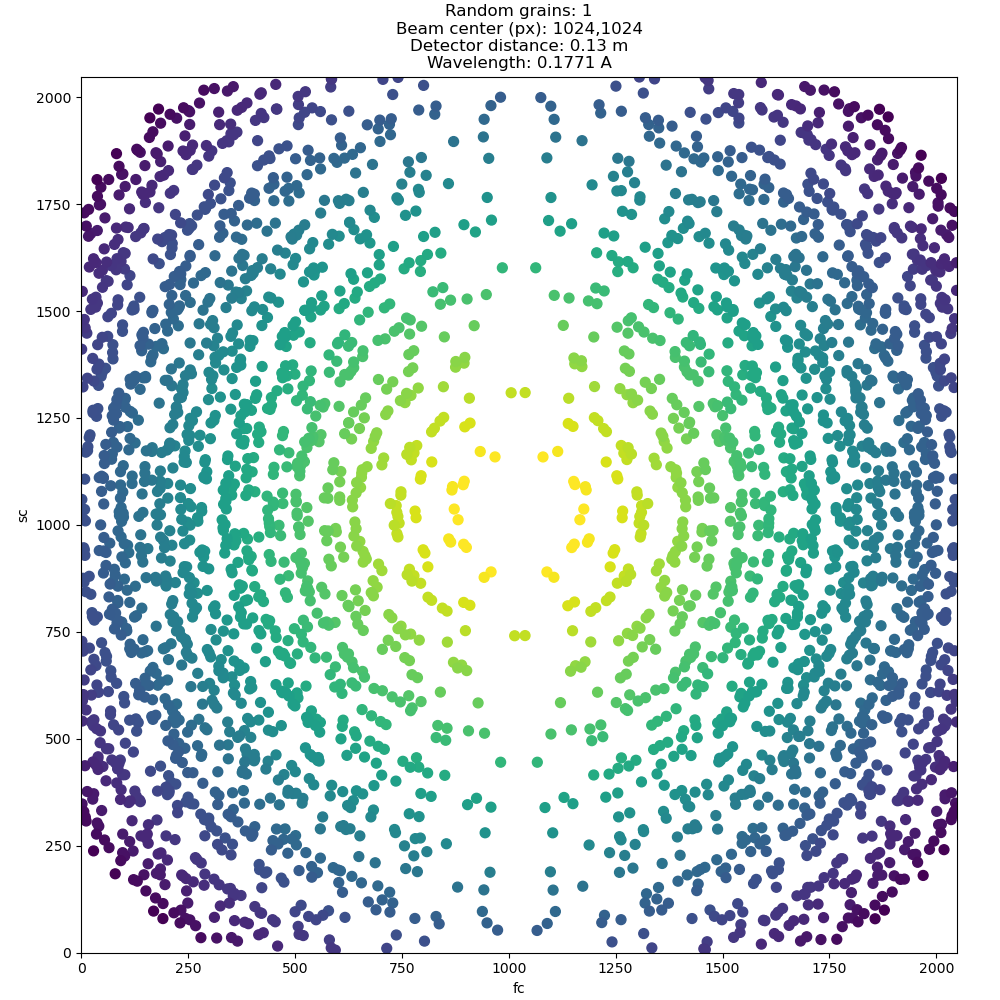

In [30]:
from matplotlib import pyplot as plt
%matplotlib ipympl

fig, ax = plt.subplots(constrained_layout=True, figsize=(10,10))
ax.scatter(fc, sc, s=50, c=inten, norm='log')

ax.set_aspect(1)
ax.set(xlim=(0, 2048), ylim=(0, 2048))
ax.set(xlabel='fc', ylabel='sc',
       title=f"""Random grains: {ng}
Beam center (px): {pars.get('y_center')},{pars.get('z_center')}
Detector distance: {pars.get('distance')/1e6:.4} m
Wavelength: {pars.get('wavelength'):.4} A""")
plt.show()

In [31]:
origin_sample

array([[258.96997228, 231.54176807, -39.61703634],
       [258.96997228, 231.54176807, -39.61703634],
       [258.96997228, 231.54176807, -39.61703634],
       ...,
       [258.96997228, 231.54176807, -39.61703634],
       [258.96997228, 231.54176807, -39.61703634],
       [258.96997228, 231.54176807, -39.61703634]])

In [32]:
cf = ImageD11.columnfile.columnfile(new=True)
cf.nrows = len(sc)
cf.addcolumn(sc, 'sc')
cf.addcolumn(fc, 'fc')
cf.addcolumn(omega, 'omega')
cf.addcolumn(inten, 'sum_intensity')
cf.parameters = pars
cf.updateGeometry()

In [33]:
# now let's assume we don't know origin_sample
# can we minimize the error to determine it?

In [34]:
# we have some peaks on the detector
# we compute g-vectors with no origin
# the error term is dhkl
# we minimise dhkl by messing with origin

In [35]:
UBI = jnp.linalg.inv(UB)

In [36]:
def evaluate_origin(origin_sample):
    # take measured peaks on the detector (sc, fc, omega)
    # take assumed origin in the (rotating) sample frame
    # map it into the lab frame (apply omega rotations)
    origin_lab = mytrans._sample_to_lab(origin_sample, cf.omega, pars.get('wedge'), pars.get('chi'))

    # backward-project observed detector peaks into g-vectors
    q_sample_trial = mytrans.det_to_q_sample(cf.sc, cf.fc, cf.omega, jnp.broadcast_to(jnp.squeeze(origin_lab), (len(cf.sc), 3)), k_in_norm, pars.get('wedge'), pars.get('chi'), pars.get('wavelength'), det_trans, beam_cen_shift, x_distance_shift)
    # measure how close g-vectors are to hkl integers by mapping into Miller space
    # compute drlv2 sum
    hkl_trial_float = UBI[0] @ q_sample_trial.T
    # hkl_trial_int = jnp.rint(hkl_trial_float)
    # hkl_diff = hkl_trial_float - hkl_trial_int
    # drlv2 = jnp.sum(jnp.power(hkl_diff, 2))

    drlv2_smooth = jnp.sum(jnp.power(jnp.sin(jnp.pi * hkl_trial_float), 2))
    
    return drlv2_smooth

In [37]:
xvals = jnp.linspace(-0.1, 0.1, 100)
yvals = jnp.full_like(xvals, 1.0)
zvals = jnp.full_like(xvals, 2.0)
hkls = jnp.column_stack((xvals, yvals, zvals))
scores = jnp.sum(jnp.power(jnp.sin(jnp.pi * hkls), 2), axis=1)

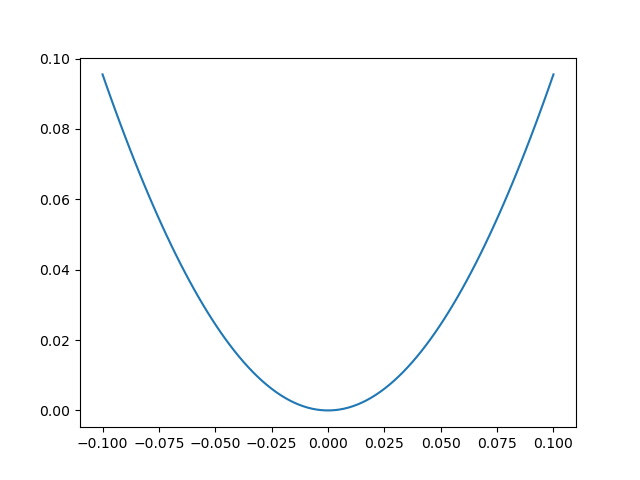

In [38]:
fig, ax = plt.subplots()
ax.plot(xvals, scores)
plt.show()

In [ ]:
jnp.sum(jnp.power(jnp.sin(jnp.pi * jnp.array([1.005, 1.01, 0.001])), 2))

In [ ]:
tx, ty, tz

In [39]:
evaluate_origin(jnp.array([0, 0, 0]))

Array(42.81742374, dtype=float64)

In [40]:
evaluate_origin(jnp.array([380, 0, 0]))

Array(24.86605895, dtype=float64)

In [41]:
evaluate_origin(jnp.array([380, 262, 0]))

Array(6.36913671, dtype=float64)

In [ ]:
evaluate_origin(jnp.array([tx-100, ty-100, tz+100]))

In [42]:
evaluate_origin(jnp.array([tx-0.1, ty+0.1, tz-0.1]))

Array(1.3117317e-05, dtype=float64)

In [ ]:
evaluate_origin(jnp.array([0, 0, 0]))

In [ ]:
evaluate_origin(jnp.array([tx-0.1, ty+0.1, tz-0.1]))

In [43]:
from jax.scipy import optimize

In [49]:
result = optimize.minimize(evaluate_origin, jnp.array([0., 0., 0.]), method='BFGS')

In [50]:
result.x

Array([258.97224906, 231.53997673, -39.61695215], dtype=float64)

In [51]:
jnp.array([tx, ty, tz]).T - result.x

Array([[-2.27677892e-03,  1.79133732e-03, -8.41928485e-05]], dtype=float64)